In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
#Estilo gráficas 
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [55]:
pd.set_option('display.max_colwidth', None)


In [ ]:
# Carga de datos utilizando traducciones
train = pd.read_csv('../data/sales_train.csv')
items = pd.read_csv('../data/items_en.csv') 
cats = pd.read_csv('../data/item_categories_en.csv')
shops = pd.read_csv('../data/shops_en.csv')

print("filas y columnas train",train.shape)
print("filas y columnas train",items.shape)
print("filas y columnas train",cats.shape)
print("filas y columnas train",shops.shape)

filas y columnas train (2935849, 6)
filas y columnas train (22170, 3)
filas y columnas train (84, 2)
filas y columnas train (60, 2)


In [57]:
# Revisión de contenido 

print("Contenido TRAIN")
print("Columnas:", train.columns.tolist())

print("Contenido ITEMS")
print("Columnas:", items.columns.tolist())
#print(items.head(), "\n")

print("Contenido CATS")
print("Columnas:", cats.columns.tolist())
#print(cats.head(), "\n")

print("Contenido SHOP")
print("Columnas:", shops.columns.tolist())
#print(shops.head(), "\n")

Contenido TRAIN
Columnas: ['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']
Contenido ITEMS
Columnas: ['item_name', 'item_id', 'item_category_id']
Contenido CATS
Columnas: ['item_category_name', 'item_category_id']
Contenido SHOP
Columnas: ['shop_name', 'shop_id']


In [58]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00
1,03.01.2013,0,25,2552,899.00,1.00
2,05.01.2013,0,25,2552,899.00,-1.00
3,06.01.2013,0,25,2554,1709.05,1.00
4,15.01.2013,0,25,2555,1099.00,1.00


In [59]:
items.head()

,item_name,item_id,item_category_id
0,! POWER IN glamor (PLAST.) D,0,40
1,"! ABBYY FineReader 12 Professional Edition Full [PC, Digital Version]",1,76
2,*** In the glory (UNV) D,2,40
3,*** BLUE WAVE (Univ) D,3,40
4,*** BOX (GLASS) D,4,40


In [60]:
cats.head()

,item_category_name,item_category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4


In [61]:
shops.head()

,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 Franc",0
1,"! Yakutsk TC ""Central"" Franc",1
2,"Adygea TC ""Mega""",2
3,"Balashikha TRC ""October-Kinomir""",3
4,"Volzhsky mall ""Volga Mall""",4


In [62]:
# Uniones con tablas de traducciones
# train + items
train = pd.merge(train, items, on='item_id', how='left')

# train + categorías
train = pd.merge(train, cats, on='item_category_id', how='left')

# # train + shop
train = pd.merge(train, shops, on='shop_id', how='left')

# Formato fecha
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')

In [63]:
# Revisión de campos nulos
# Datos faltantes
# Conteo nulos 
print("Valores nulos")
nulos = train.isnull().sum()
print(nulos[nulos > 0]) 

Valores nulos
Series([], dtype: int64)


In [64]:
# Verificación
print("filas y columnas train",train.shape)
train.sort_values("date", ascending=True).head()

filas y columnas train (2935849, 10)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
49800,2013-01-01,0,18,5823,2500.00,1.00,Playstation Store replenishment wallet: Card Payment 2500 rub.,35,Payment cards - PSN,"Krasnoyarsk SC ""June"""
29784,2013-01-01,0,27,5573,849.00,1.00,PS Move Motion Controller Charger (Зарядная станция/подставка для контроллера PS Move),2,Accessories - PS3,"Moscow shopping center ""MEGA Belaya Dacha II"""
35476,2013-01-01,0,7,1006,399.00,1.00,3D Crystal Puzzle Dolphins XL,67,Gifts - Development,"Voronezh TRC ""Maksimir"""
8330,2013-01-01,0,19,17707,899.00,1.00,"Праздник спорта (Essentials) (только для PS Move) [PS3, русская версия]",19,Games - PS3,"Kursk TC ""Pushkin"""
57384,2013-01-01,0,14,19548,149.00,1.00,Jack and Jill (region),40,Movie - DVD,"Kazan shopping mall of ""Parkhouse"" II of"


Diccionario de variables:
- **date:**           fecha de la venta
- **date_block_num:**   índice consecutivo de mes (0,1,2,…) para representar el tiempo en meses. 0 = enero-2013 33 = octubre-2015. 
- **shop_id:**          identificador de tienda/sucursal.
- **item_id:**          identificador de producto.
- **item_price:**       precio del ítem en esa transacción por día.
- **item_cnt_day:**     cantidad vendida ese día (>= 1 son ventas; <0 (negativas) son devoluciones.
- **item_name:**        Descripcion del item
- **item_category_id:** id de categoria de productos
- **shop_name:**        nombre de la tienda donde ocurrió la transacción


In [65]:
# Estadísticas básicas totales

#Numéricas
pd.set_option('display.float_format', lambda x: '%.2f' % x)
train.describe()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2935849,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00
mean,2014-04-03 05:44:34.970681344,14.57,33.00,10197.23,890.85,1.24,40.00
min,2013-01-01 00:00:00,0.00,0.00,0.00,-1.00,-22.00,0.00
25%,2013-08-01 00:00:00,7.00,22.00,4476.00,249.00,1.00,28.00
50%,2014-03-04 00:00:00,14.00,31.00,9343.00,399.00,1.00,40.00
75%,2014-12-05 00:00:00,23.00,47.00,15684.00,999.00,1.00,55.00
max,2015-10-31 00:00:00,33.00,59.00,22169.00,307980.00,2169.00,83.00
std,NaN,9.42,16.23,6324.30,1729.80,2.62,17.10


In [66]:
# Valores destintos en cada columna del dataframe
train.nunique()

date                   1034
date_block_num           34
shop_id                  60
item_id               21807
item_price            19993
item_cnt_day            198
item_name             21793
item_category_id         84
item_category_name       84
shop_name                60
dtype: int64

In [67]:
# Numero de ventas por fecha
train_gpd_by_date = train.groupby(train["date"].dt.date)
sales_per_date = train.groupby(train["date"].dt.date).size().reset_index(name="sales")

train.groupby("date").size()

date
2013-01-01    1669
2013-01-02    6718
2013-01-03    6298
2013-01-04    5634
2013-01-05    5545
              ... 
2015-10-27    1361
2015-10-28    1238
2015-10-29    1405
2015-10-30    1938
2015-10-31    2579
Length: 1034, dtype: int64

<Axes: xlabel='date'>

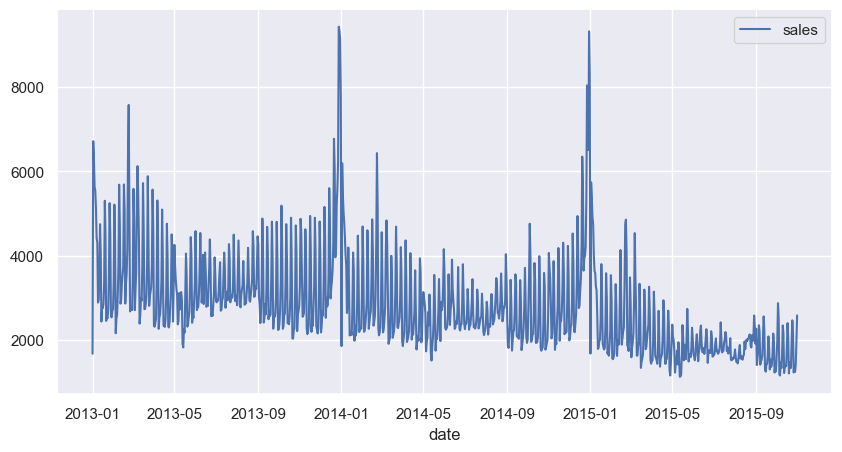

In [68]:
sales_per_date.plot(x="date", y="sales", kind="line", figsize=(10, 5))

In [69]:
#Categóricas
train.describe(include=['object'])

,item_name,item_category_name,shop_name
count,2935849,2935849,2935849
unique,21793,84,60
top,Corporate package white shirt 1C Interest (34 * 42) 45 m,Movie - DVD,"Moscow shopping center ""Semyonov"""
freq,31340,564652,235636


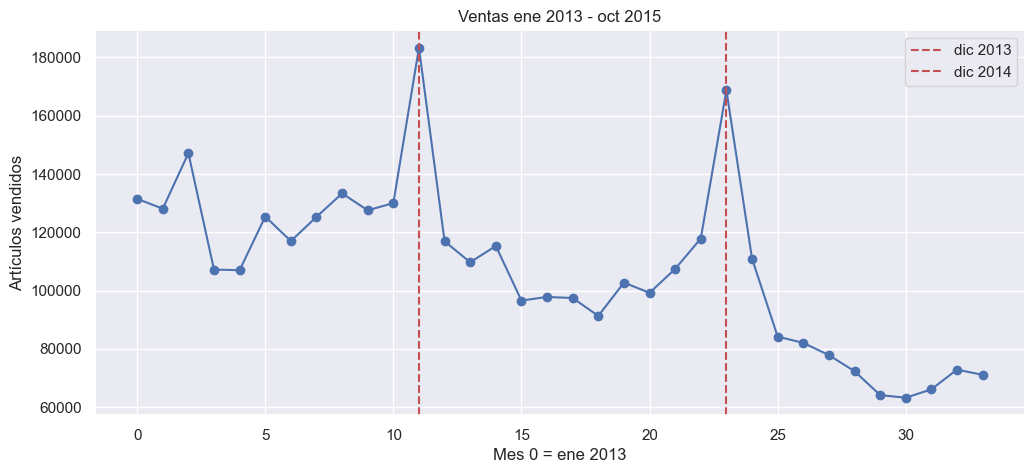

In [70]:
# REVISIÓN INCIAL DE VENTAS

# Agrupar ventas por mes 
monthly_sales = train.groupby('date_block_num')['item_cnt_day'].sum()

# Gráficas 
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='b')
plt.title('Ventas ene 2013 - oct 2015')
plt.xlabel('Mes 0 = ene 2013')
plt.ylabel('Artículos vendidos')
plt.axvline(x=11, color='r', linestyle='--', label='dic 2013') 
plt.axvline(x=23, color='r', linestyle='--', label='dic 2014') 
plt.legend()
plt.show()


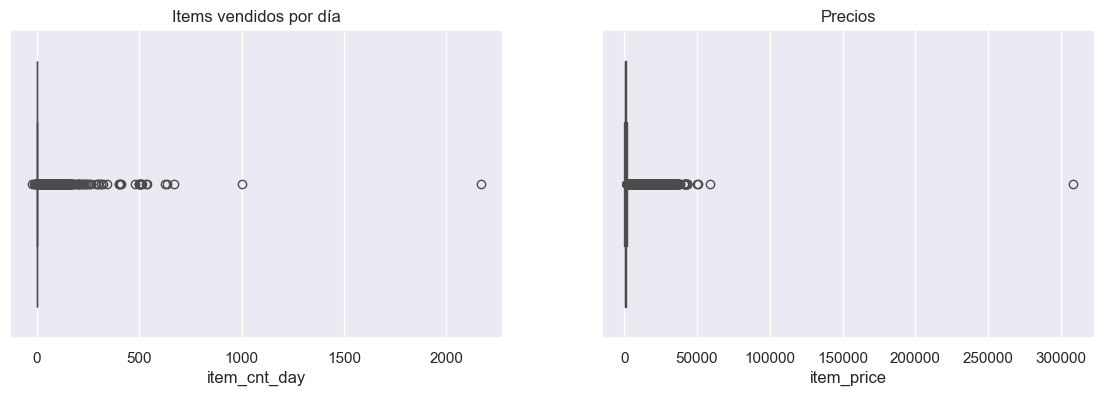

In [71]:
# REVISIÓN OUTLIERS
# Para número de artículos vendidos y comportamiento de precios
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.boxplot(x=train['item_cnt_day'], ax=ax[0])
ax[0].set_title('Items vendidos por día')

sns.boxplot(x=train['item_price'], ax=ax[1])
ax[1].set_title('Precios')

plt.show()

In [72]:
train.sort_values("item_price", ascending=False).head(15)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
1163158,2013-12-13,11,12,6066,307980.00,1.00,Radmin 3 - 522 лиц.,75,Program - For home and office,Shop Online Emergencies
885138,2013-09-17,8,12,11365,59200.00,1.00,Shipping (EMS),9,Delivery of goods,Shop Online Emergencies
1488135,2014-03-20,14,25,13199,50999.00,1.00,Collector chess (Rings),69,Gifts - Souvenirs,"Moscow TRC ""Atrium"""
2327159,2015-01-29,24,12,7241,49782.00,1.00,UserGate Proxy & Firewall 6.X filtration module sites Entensys URL Filtering up to 200 sessions (Academic / Social),75,Program - For home and office,Shop Online Emergencies
2931380,2015-10-20,33,22,13403,42990.00,1.00,"Комплект ""Microsoft Xbox One 1TB Limited Edition Halo 5 + ""Halo 5. Limited Edition"" [KF6-00012]",16,Game consoles - XBOX ONE,Moscow Shop C21
2917760,2015-10-20,33,3,13403,42990.00,1.00,"Комплект ""Microsoft Xbox One 1TB Limited Edition Halo 5 + ""Halo 5. Limited Edition"" [KF6-00012]",16,Game consoles - XBOX ONE,"Balashikha TRC ""October-Kinomir"""
2910156,2015-10-29,33,12,13403,42990.00,1.00,"Комплект ""Microsoft Xbox One 1TB Limited Edition Halo 5 + ""Halo 5. Limited Edition"" [KF6-00012]",16,Game consoles - XBOX ONE,Shop Online Emergencies
2885692,2015-10-23,33,42,13403,42990.00,1.00,"Комплект ""Microsoft Xbox One 1TB Limited Edition Halo 5 + ""Halo 5. Limited Edition"" [KF6-00012]",16,Game consoles - XBOX ONE,"St. Petersburg TK ""Nevsky Center"""
1006638,2013-10-24,9,12,7238,42000.00,1.00,UserGate Proxy & Firewall 6.X до 100 сессий,75,Program - For home and office,Shop Online Emergencies
2910155,2015-10-20,33,12,13403,41990.00,1.00,"Комплект ""Microsoft Xbox One 1TB Limited Edition Halo 5 + ""Halo 5. Limited Edition"" [KF6-00012]",16,Game consoles - XBOX ONE,Shop Online Emergencies


In [73]:
train["item_category_name"].unique()
#Payment cards - Live!
#Tickets (digits)

array(['Movies - Blu-Ray', 'Music - Vinyl', 'Music - CD production firm',
       'Music - Music video', 'Music - CD of local production',
       'Games - XBOX 360', 'Games - PS3',
       'Games PC - Additional publications',
       'Games PC - Standard Edition', 'Games - PSP', 'Movie - DVD',
       'Program - For home and office', 'Books - Methodical materials 1C',
       "Games PC - Collector's Edition", 'Games - PSVita',
       'Gifts - Development', 'Program - 1C: Enterprise 8',
       'Program - Educational', 'Music - MP3', 'Music - Gift Edition',
       'Accessories - PSP', 'Gifts - gadgets, robots, sports',
       'Books - Audiobooks', 'Game consoles - XBOX 360',
       'Accessories - PS3', 'Accessories - PS4', 'Accessories - PSVita',
       'Gifts - certificates, services', 'Payment cards - PSN',
       'Payment cards - Live!', 'Accessories - XBOX 360',
       'Movies - Blu-Ray 3D', 'Games - Accessories for games',
       'Game consoles - PSVita', 'Books - Audiobooks 1C',
      

In [74]:
train = train[
    (~train["item_category_name"].isin(["Utilities - Tickets", "Games PC - Digital","Payment cards - PSN","	Payment cards - Live!","Delivery of goods"])) &
    (~train["item_category_name"].str.contains("Payment card", case=False, na=False)) &
    (train["shop_name"] != "Digital storage 1C-line") &
    (~train["item_name"].str.contains("Card Payment", case=False, na=False)) &
    (~train["item_name"].str.contains("payment card", case=False, na=False)) &
    #EMS = Express Mail Service son productos que no se venden fisicamente. son normalmente de ventas online y son los cargos de paqueteria
    (~train["item_name"].str.contains("EMS", case=False, na=False))
]

In [75]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-01-02,0,59,22154,999.00,1.00,Scene 2012 (BD),37,Movies - Blu-Ray,"Yaroslavl shopping center ""Altair"""
1,2013-01-03,0,25,2552,899.00,1.00,DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl,"Moscow TRC ""Atrium"""
2,2013-01-05,0,25,2552,899.00,-1.00,DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl,"Moscow TRC ""Atrium"""
3,2013-01-06,0,25,2554,1709.05,1.00,DEEP PURPLE Who Do You Think We Are LP,58,Music - Vinyl,"Moscow TRC ""Atrium"""
4,2013-01-15,0,25,2555,1099.00,1.00,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Music - CD production firm,"Moscow TRC ""Atrium"""
...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.00,V/A Nu Jazz Selection (digipack),55,Music - CD of local production,"Moscow TRC ""Atrium"""
2935845,2015-10-09,33,25,7460,299.00,1.00,V/A The Golden Jazz Collection 1 2CD,55,Music - CD of local production,"Moscow TRC ""Atrium"""
2935846,2015-10-14,33,25,7459,349.00,1.00,V/A The Best Of The 3 Tenors,55,Music - CD of local production,"Moscow TRC ""Atrium"""
2935847,2015-10-22,33,25,7440,299.00,1.00,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Music - MP3,"Moscow TRC ""Atrium"""


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name


In [85]:
# Limpieza valores atípicos

# Eliminar precios negativos
train = train[train['item_price'] > 0]

# Eliminar precios muy altos
train = train[train['item_price'] < 100000]

#Eliminar número de unidades vendidas muy altas
train = train[train['item_cnt_day'] < 1000]



In [86]:
# Devoluciones 
print(" % devoluciones:", (train[train['item_cnt_day'] < 0].shape[0] / train.shape[0]) * 100)

# Duplicados 

print("Duplicados:", train.duplicated().sum())
train = train.drop_duplicates()

print("Filas y columnas después de limpieza", train.shape) 
# azu: devoluciones: 0.25055818682525816 filas, cols (2935839, 10)
# dan: devoluciones: 0.2564342398563968              (2852583, 10)

 % devoluciones: 0.25639866100584413
Duplicados: 6
Filas y columnas después de limpieza (2852583, 10)


In [32]:
# agrupar por mes, tienda, artículo
train_gpd = train.groupby(['date_block_num', 'shop_id', 'item_id']).agg({
    'item_cnt_day': 'sum',
    'item_price': 'mean',
    "item_category_id": 'first',
    "item_category_name": 'first',
    "shop_name":"first"
}).reset_index()

/var/folders/kn/plfjcrfs0dl18ctdy8kqmztr_ptdt5/T/ipykernel_50798/1407885904.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train_gpd, x='date_block_num', y='item_cnt_day', hue='item_category_name', estimator='sum', ci=None)


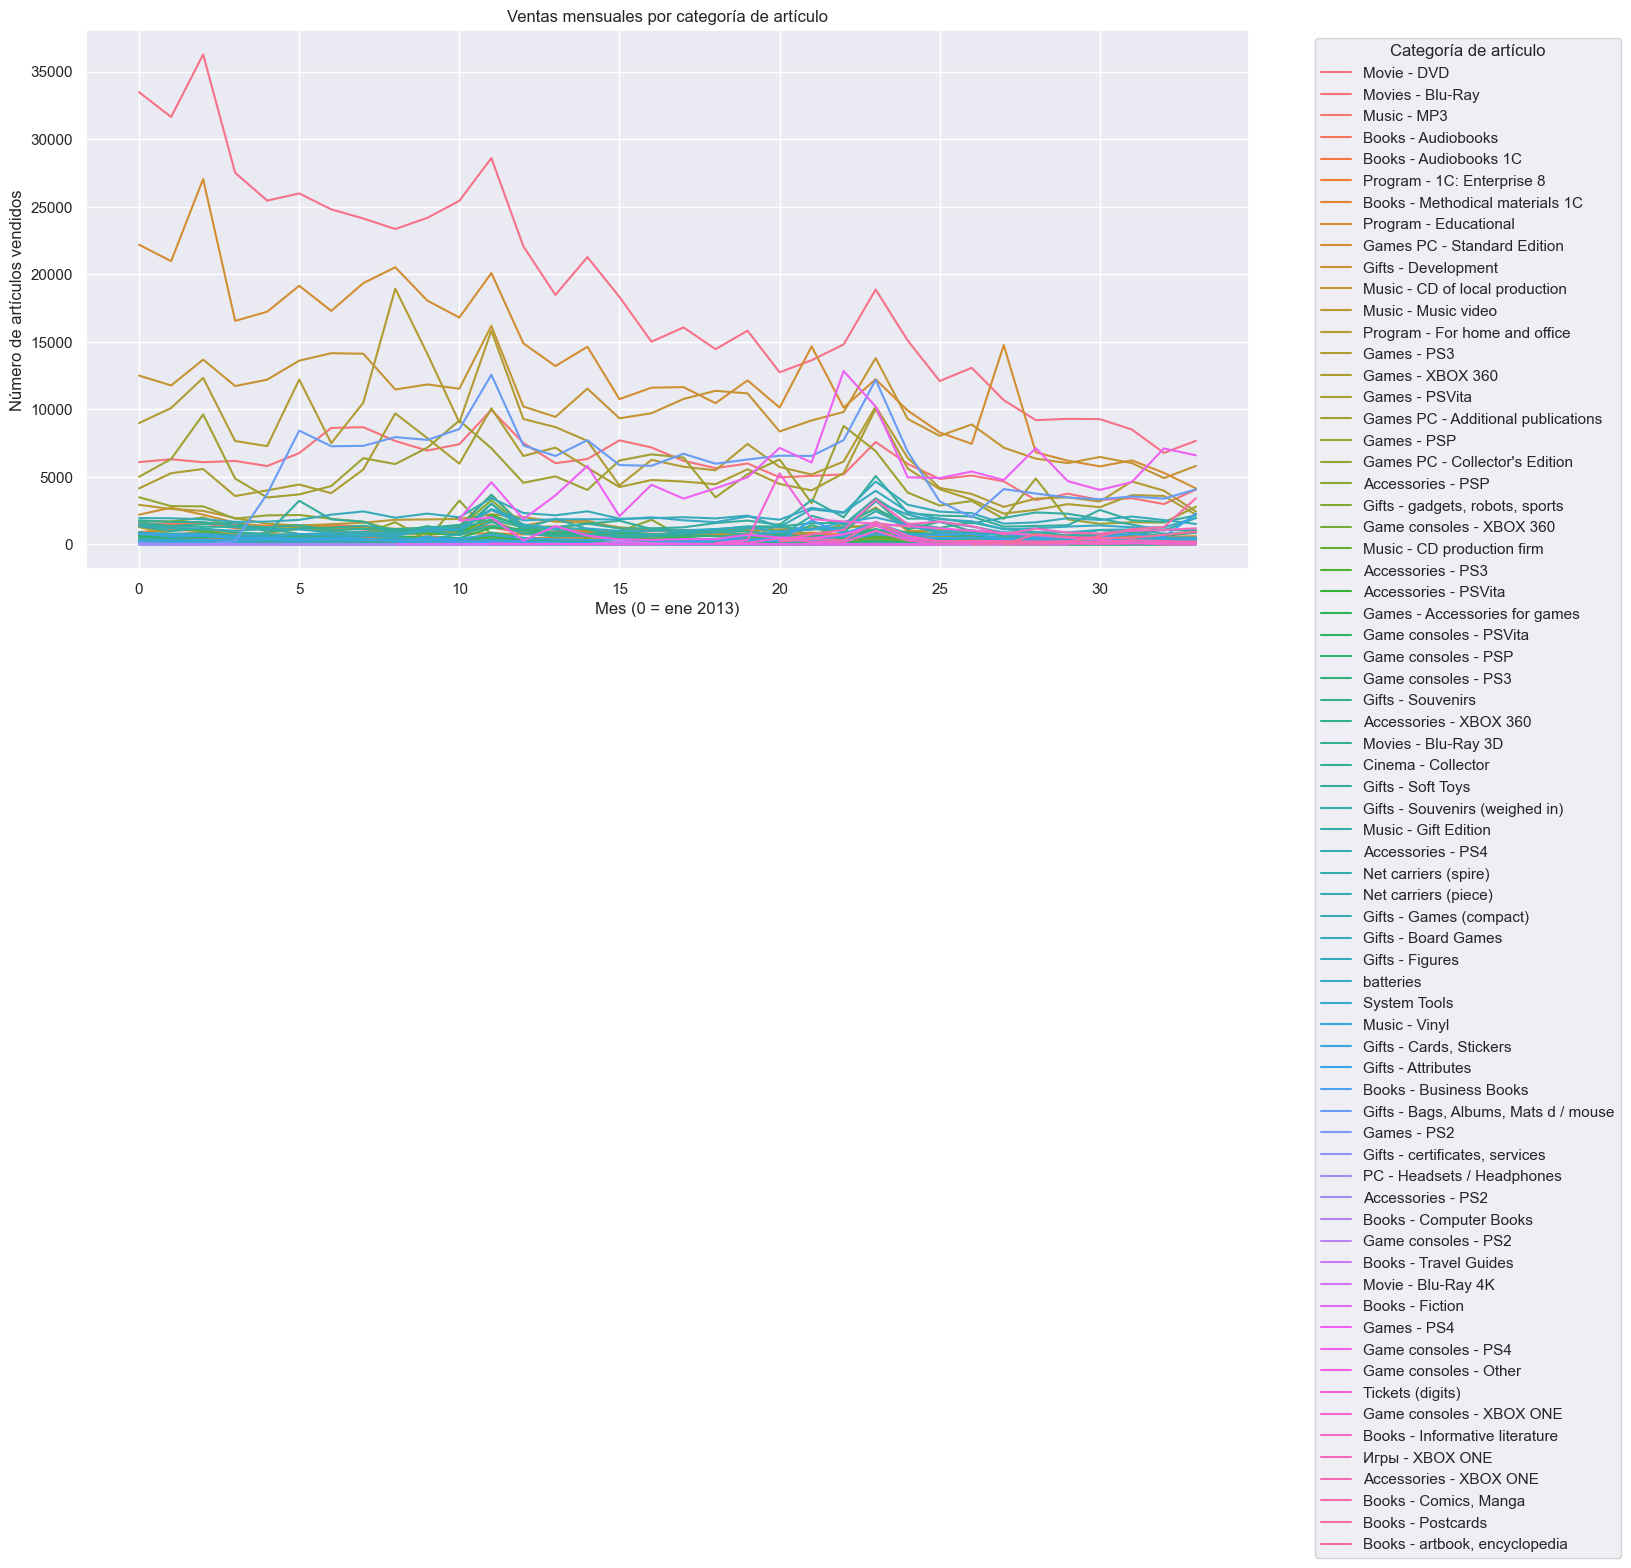

In [33]:
# plot ventas por item_category_name vs mes
plt.figure(figsize=(15, 7))
sns.lineplot(data=train_gpd, x='date_block_num', y='item_cnt_day', hue='item_category_name', estimator='sum', ci=None)
plt.title('Ventas mensuales por categoría de artículo')
plt.xlabel('Mes (0 = ene 2013)')
plt.ylabel('Número de artículos vendidos')
plt.legend(title='Categoría de artículo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()  

/var/folders/kn/plfjcrfs0dl18ctdy8kqmztr_ptdt5/T/ipykernel_50798/2096536071.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train_gpd, x='date_block_num', y='item_cnt_day', hue='shop_name', estimator='sum', ci=None)


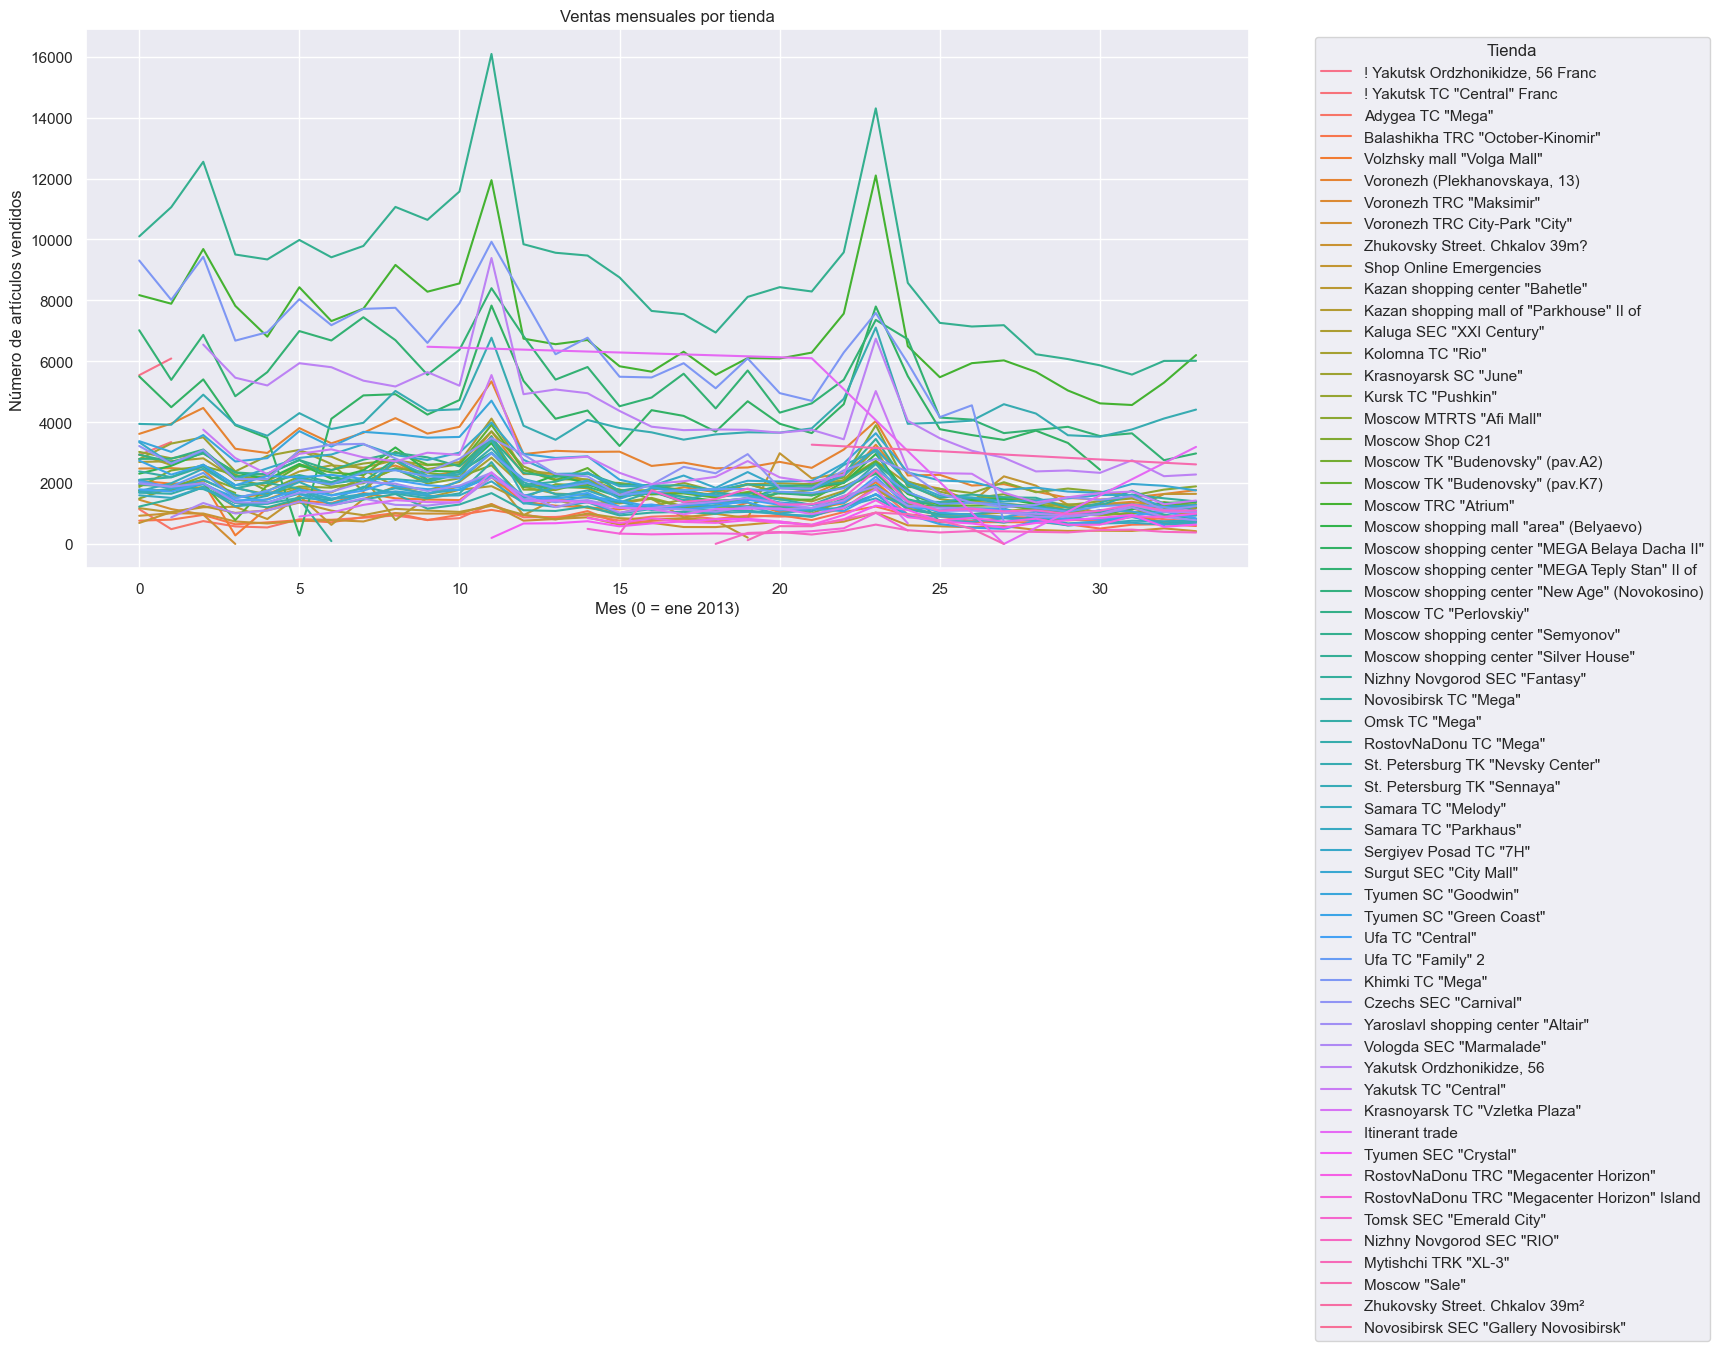

In [34]:
#plot ventas por shop_name vs mes
plt.figure(figsize=(15, 7))
sns.lineplot(data=train_gpd, x='date_block_num', y='item_cnt_day', hue='shop_name', estimator='sum', ci=None)
plt.title('Ventas mensuales por tienda')
plt.xlabel('Mes (0 = ene 2013)')
plt.ylabel('Número de artículos vendidos')
plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()  

In [ ]:
# Revisión de tiendas abiertas 
sales_by_shop = train.pivot_table(index='shop_id', columns='date_block_num', values='item_cnt_day', aggfunc='sum')

# Meses sin ventas 
sales_by_shop = sales_by_shop.fillna(0)

# Heat map
plt.figure(figsize=(20, 10))
sns.heatmap(sales_by_shop, cmap='viridis', vmin=0, vmax=2000) # vmin/vmax ajustan el contraste
plt.title('Ventas por tienda')
plt.xlabel('mes 0 = ene 2013')
plt.ylabel('ID Tienda')
plt.show()

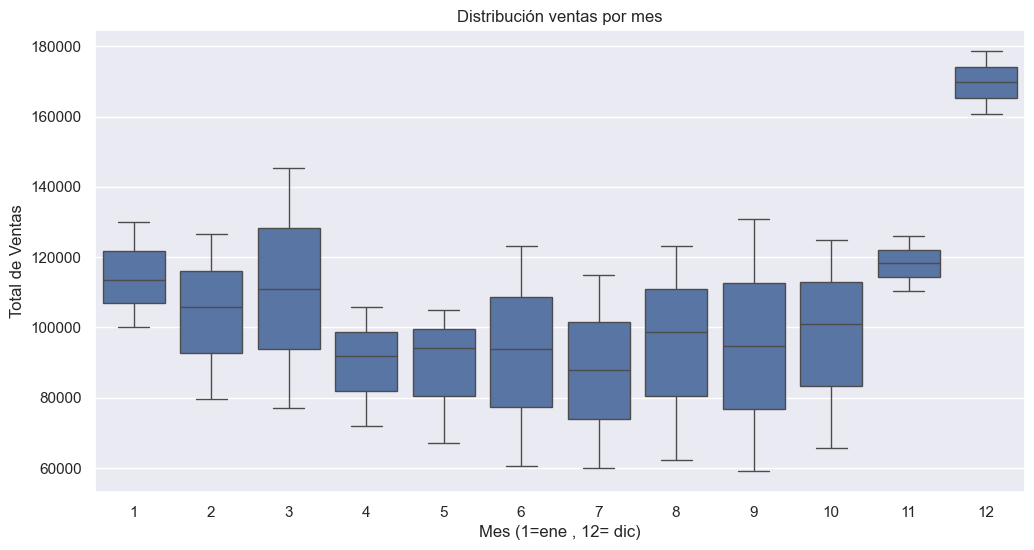

In [88]:
# Check 2 ventas por mes 

train['month'] = train['date'].dt.month

# Suma de ventas por mes
monthly_sales = train.groupby(['date_block_num', 'month'])['item_cnt_day'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='item_cnt_day', data=monthly_sales)
plt.title('Distribución ventas por mes')
plt.xlabel('Mes (1=ene , 12= dic)')
plt.ylabel('Total de Ventas')
plt.show()

/var/folders/kn/plfjcrfs0dl18ctdy8kqmztr_ptdt5/T/ipykernel_69238/3569318187.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cat_sales.index[:20], x=cat_sales.values[:20], palette='magma')


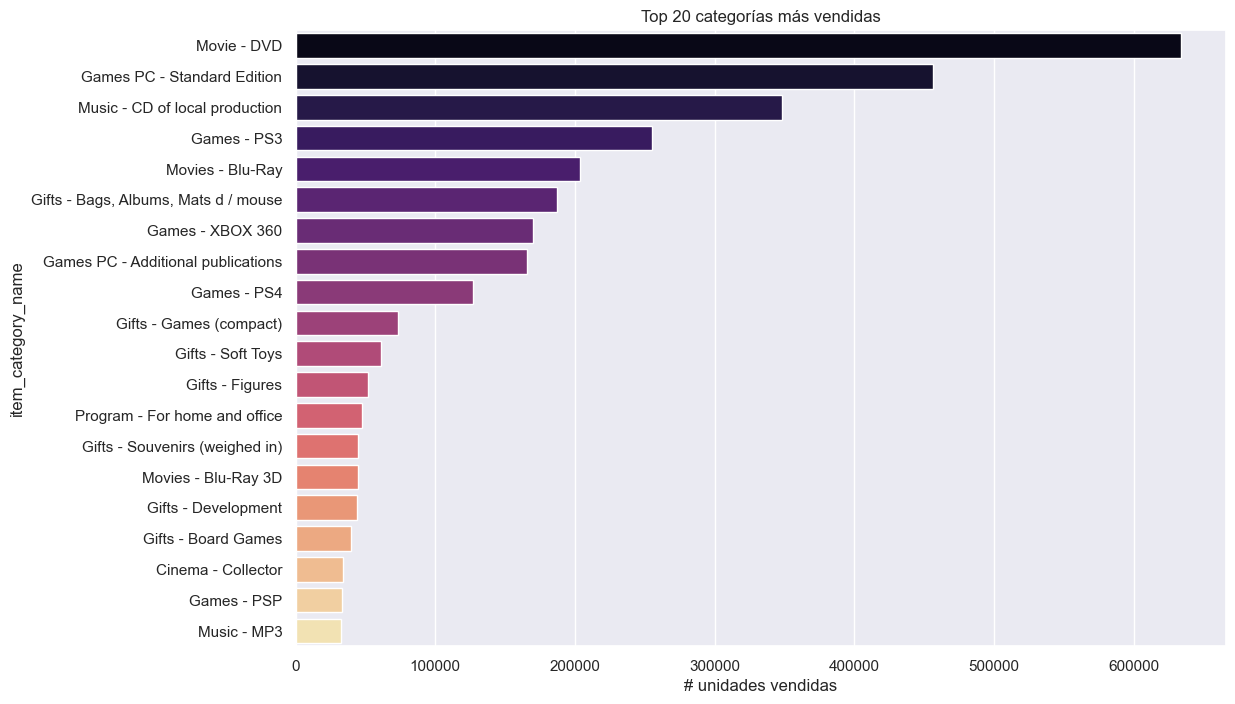

In [89]:
# CATEGORÍAS TOP

# Ventas por categoría
cat_sales = train.groupby('item_category_name')['item_cnt_day'].sum().sort_values(ascending=False)

# Top 20
plt.figure(figsize=(12, 8))
sns.barplot(y=cat_sales.index[:20], x=cat_sales.values[:20], palette='magma')
plt.title('Top 20 categorías más vendidas')
plt.xlabel('# unidades vendidas')
plt.show()

In [90]:
# Revisión de tiendas train vs test
test = pd.read_csv('test.csv')

# Tiendas 
tiendas_train = set(train['shop_id'].unique())
tiendas_test = set(test['shop_id'].unique())
print("Tiendas nuevas en test:", tiendas_test - tiendas_train)

# Productos 
items_train = set(train['item_id'].unique())
items_test = set(test['item_id'].unique())
print("Productos nuevos en test:", len(items_test - items_train))

Tiendas nuevas en test: {np.int64(55)}
Productos nuevos en test: 788


In [91]:
# CONSOLIDACIÓN DE INFORMACIÓN MES-> TIENDA -> PRODUCTO -> VENTAS

from itertools import product

# Matriz mes-tienda-item
matrix = []
cols = ['date_block_num','shop_id','item_id']

for i in range(34):
    sales = train[train.date_block_num==i]
    matrix.append(np.array(list(product([i], sales.shop_id.unique(), sales.item_id.unique())), dtype='int16'))

matrix = pd.DataFrame(np.vstack(matrix), columns=cols)
matrix['date_block_num'] = matrix['date_block_num'].astype(np.int8)
matrix['shop_id'] = matrix['shop_id'].astype(np.int8)
matrix['item_id'] = matrix['item_id'].astype(np.int16)
matrix.sort_values(cols, inplace=True)

# Incluimos las ventas por mes
group = train.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day': ['sum']})
group.columns = ['item_cnt_month']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=cols, how='left')

# Reemplazamos nulos por 0
matrix['item_cnt_month'] = (matrix['item_cnt_month']
                                .fillna(0)
                                .clip(0,20) # Limitamos a 20 como pide la competencia
                                .astype(np.float16))

print("Dimensiones matriz:", matrix.shape)
matrix.head()

Dimensiones matriz: (10069257, 4)


,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,19,0.00
1,0,0,27,0.00
2,0,0,28,0.00
3,0,0,29,0.00
4,0,0,32,6.00


In [92]:
# Filas con 0 ventas
ceros = matrix[matrix['item_cnt_month'] == 0].shape[0]
total = matrix.shape[0]
porcentaje_sin_ventas = (ceros / total) * 100

print(f"Total de combinaciones Mes-Tienda-Producto: {total}")
print(f"Combinaciones con 0 ventas: {ceros}")
print(f"Porcentaje sin ventas: {porcentaje_sin_ventas:.2f}%")

Total de combinaciones Mes-Tienda-Producto: 10069257
Combinaciones con 0 ventas: 8490915
Porcentaje sin ventas: 84.33%
